# Linear Regression Demo Lab
In this lab we'll use linear regression to predict the progression of diabetes in a set of 442 patients (this is a standard dataset that is often used to test & validate regression methods).

In [1]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


In [2]:
# Run this to print a description of the diabetes dataset
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [3]:
# these are the actual names of the 10 features, which are more descriptive than the ones given by sklearn
features = "age sex bmi map tc ldl hdl tch ltg glu".split()

# Plot the regression target and each of the features
Step 1 in any analysis should _always_ be to **LOOK AT YOUR DATA**. Let's plot it and see what it looks like: what's the range, does it look uniform, etc.

In [4]:
# diabetes_X is the array containing the regressors
diabetes_X = diabetes.data

In [5]:
# print the shape of diabetes_X here. what are the dimensions? what do they mean?
diabetes_X.shape

(442, 10)

In [6]:
# diabetes_y is the regression "target"; i.e. the output variable that we are trying to predict
diabetes_y = diabetes.target

In [7]:
# print the shape of diabetes_y here. what are the dimensions? what do they mean?
diabetes_y.shape

(442,)

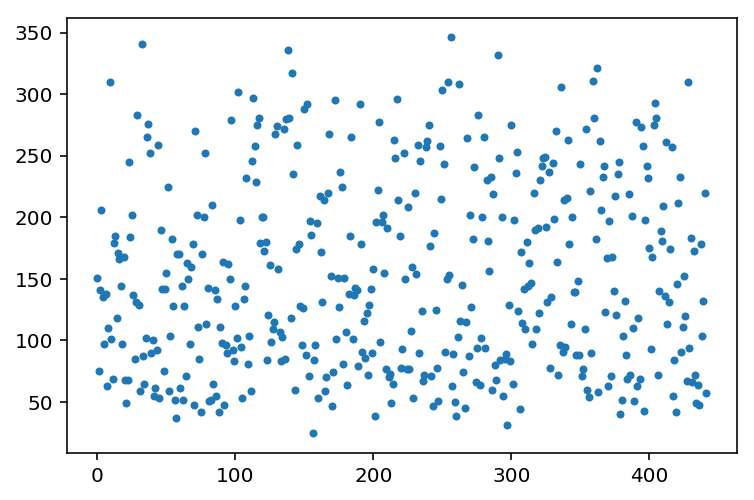

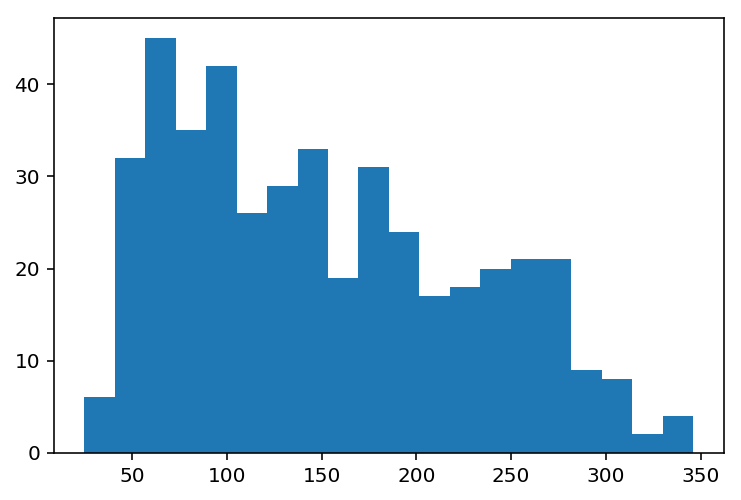

In [10]:
# now create 2 plots: first plot diabetes_y as points with the subjects along the x-axis
plt.plot(diabetes_y, '.')

# then plot a histogram of diabetes_y
plt.figure()
plt.hist(diabetes_y, 20);

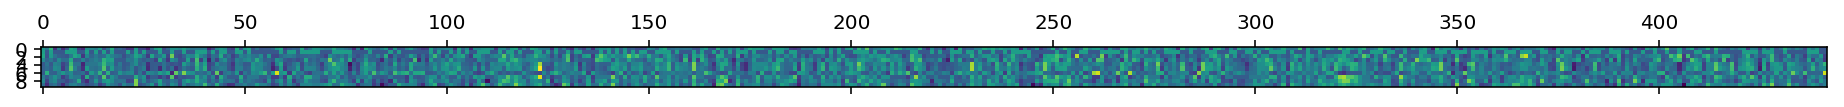

In [12]:
plt.matshow(diabetes_X.T)

Next, you _could_ just plot each of the 10 variables, but that doesn't really tell you about their relationships or give you a good sense of the data. Instead, let's create a `pairplot` that shows (1) the histogram of each feature and (2) a scatter plot of each pair of features. This could totally be done in plain `matplotlib` if you had the time and gumption, but let's just use the built-in function that's available in the `seaborn` plotting library (this is another plotting library that rides on top of `matplotlib` to provide extra functionality). We'll also have to translate `diabetes_X` into a `pandas.DataFrame`. I won't make you write that part

In [ ]:
import seaborn
import pandas

# first create a pandas DataFrame out of diabetes_X
diabetes_X_dataframe = pandas.DataFrame(diabetes_X, columns=features)

# next, use seaborn.pairplot to create a pairplot out of the dataframe
# what do you learn from this?


# Normalize variables and split data into training & test datasets
Next we're going to prepare the data for regression. First you're going to normalize your target variable (`diabetes_y`) by subtracting the mean across all datapoints. (This makes it so that we don't need to add an "intercept" feature to our regression.)

The features in `diabetes_X` have already been normalized, so we don't need to worry about that! (In fact they've been z-scored, so they each have mean 0 and standard deviation 1). In most cases you _will_ need to worry about normalizing your features, however. Can you think of why? Why does the scale matter?

In [13]:
diabetes_y_demean = diabetes_y - diabetes_y.mean()

In [14]:
diabetes_y_demean.mean()

-7.716301202824617e-15

Then you're going to split both the features (`diabetes_X`) and targets (`diabetes_y_demean`) into training and test datasets. Let's take the somewhat lazy approach of using the last 20 patients as test and the first 422 as training.

In [15]:
diabetes_X.shape

(442, 10)

In [16]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Make sure these shapes are correct!
print("diabetes_X_train.shape:", diabetes_X_train.shape)
print("diabetes_X_test.shape:", diabetes_X_test.shape)

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y_demean[:-20]
diabetes_y_test = diabetes_y_demean[-20:]

# Make sure these shapes are correct too!
print("diabetes_y_train.shape:", diabetes_y_train.shape)
print("diabetes_y_test.shape:", diabetes_y_test.shape)


diabetes_X_train.shape: (422, 10)
diabetes_X_test.shape: (20, 10)
diabetes_y_train.shape: (422,)
diabetes_y_test.shape: (20,)


# Do ordinary least squares regression!
Finally we get to do ordinary least squares regression. Use the function `np.linalg.lstsq` as we have in class. Store the outputs as `wt, res, rank, sing`. (See the lecture 34 demos & notes for an example of what this looks like.)

In [17]:
# do the regression!
wt, res, rank, sing = np.linalg.lstsq(diabetes_X_train, diabetes_y_train)

/Users/huth/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [18]:
# print the weight for each feature along with the feature name
list(zip(features, wt))

[('age', 0.4794755852119807),
 ('sex', -237.7397467667325),
 ('bmi', 510.6834222675851),
 ('map', 327.83911413227685),
 ('tc', -813.3879852952454),
 ('ldl', 491.9568549992697),
 ('hdl', 102.38490924381149),
 ('tch', 184.65973070308996),
 ('ltg', 743.219122957349),
 ('glu', 75.8291121412925)]

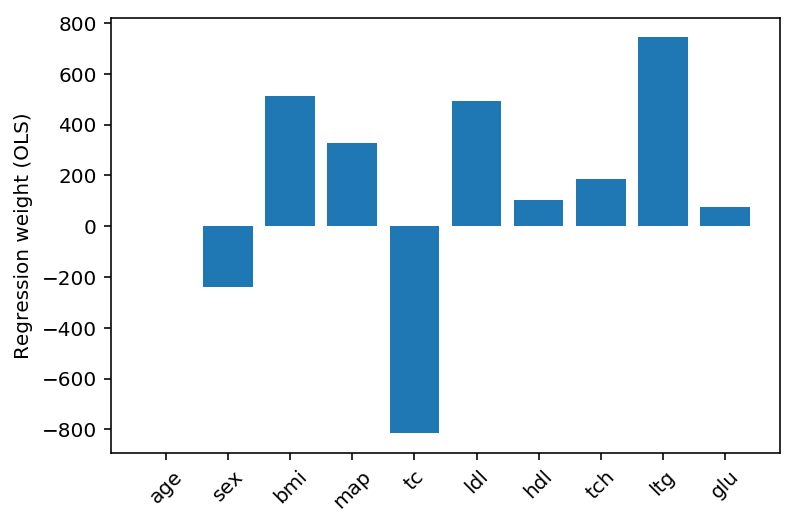

In [35]:
# make a bar plot of the weights using plt.bar
# use xlocs as the `x` input to plt.bar
plt.bar(range(len(wt)), wt)
plt.xticks(range(len(wt)), features, rotation=45);

plt.ylabel('Regression weight (OLS)');

# add labels on the x-axis using plt.xticks
# give it xlocs for the `locs` parameter, and the feature names (`features`) for the labels

# label the y-axis "Regression weight" using plt.ylabel

# what does this all tell you?

In [ ]:
# print the residual sum of squares (res). this number is not that meaningful


In [ ]:
# print the rank (rank). this is the number of linearly independent features in your feature matrix
# if it's not 10 then you should be worried


In [32]:
# print the singular values (sing)
# these tell you whether your regression was "poorly conditioned"
sing

array([1.95780615, 1.17985883, 1.07556231, 0.95794299, 0.79811156,
       0.75956653, 0.7217194 , 0.64594013, 0.2727168 , 0.09158554])

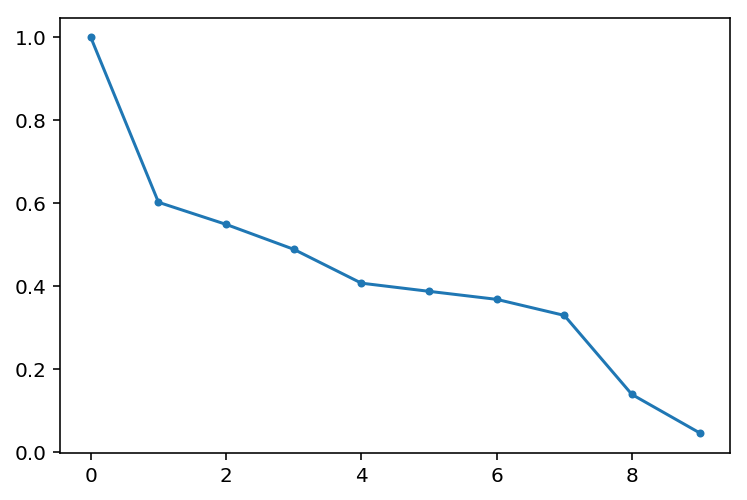

In [33]:
# plot the singular value ratios, i.e. each singular value divided by the first one (sing[0])
# use dots connected by lines
# add the title "Singular value ratios"
# what does this tell you?
plt.plot(sing/sing[0], '.-');

# Predict new data
Next let's use the regression weights to predict our test dataset. Here you want to compute $\hat{y}_i= \sum_{j=0}^{10} X_{i,j} \beta_j$, where $\hat{y}_i$ is the prediction of the $i$th datapoint in the test set, $X_{i,j}$ is the value of feature $j$ for the $i$th datapoint in the test set, and $\beta_j$ is the regression weight for feature $j$.

But you don't need to write a `for` loop or any nonsense like that! This operation can be done _very simply_ using `np.dot`.

In [22]:
wt.shape

(10,)

In [23]:
diabetes_X_test.shape

(20, 10)

In [24]:
diabetes_y_pred = diabetes_X_test.dot(wt)
print(diabetes_y_pred.shape)

(20,)


Next let's score the prediction! Instead of writing our own $R^2$ function, let's use the one from `scikit-learn`, it's called `r2_score` and we already imported it up at the top of the notebook. The first argument should be the true values (`diabetes_y_test`), and the second argument should be the predicted values (`diabetes_y_pred`).

In [25]:
# print the R^2 score for our regression model on the test dataset
r2_score(diabetes_y_test, diabetes_y_pred)

0.5886394239143563

Finally let's plot the predicted vs. actual values.

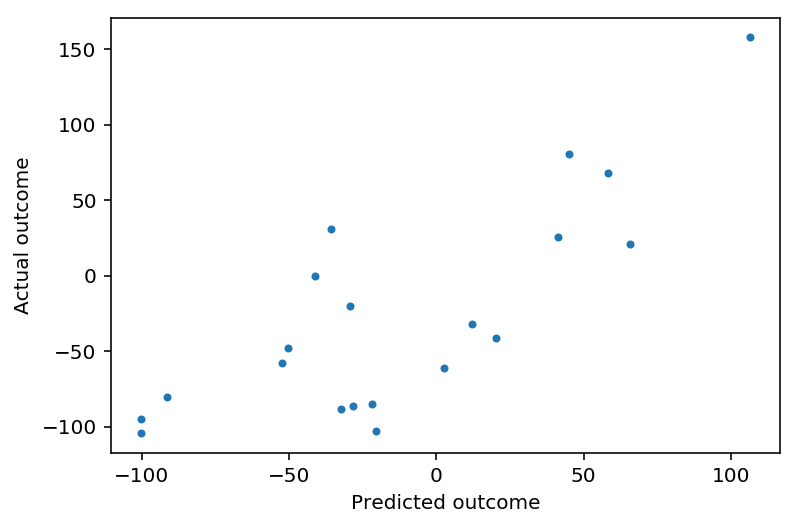

In [26]:
# use plt.plot to plot predicted y (along the x-axis) vs. true y (along the y-axis) with dots
plt.plot(diabetes_y_pred, diabetes_y_test, '.')

# use plt.xlabel and plt.ylabel to label the x- and y-axes
plt.xlabel("Predicted outcome")
plt.ylabel("Actual outcome");

# Ridge regression
So far you've used ordinary least squares linear regression, but in class we've also talked about _regularized_ regression, in which we make some assumptions about the weights (that they're small) to make the model behave better.

Instead of writing ridge regression from scratch (although that's not too hard), we're going to use functions built-in to `scikit-learn`, which is a wonderful machine learning library. It also automatically handles things like cross-validation so we don't need to worry about doing that ourselves. (Note that `RidgeCV` calls the regularization coefficient "alpha", whereas we've been calling it "lambda" or $\lambda$. These refer to the same thing.)

(Actually, we're going to be using a modified version of cross-validation called "Generalized Cross-Validation" or GCV. This clever techniques mimics leave-one-out cross validation, which is fine for a dataset like this one, without actually doing the full regression for each held-out datapoint.)

In [27]:
# this is the set of regularization parameters that we are going to test
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Create RidgeCV object
# this uses the `linear_model` module that we imported from scikit-learn up top
regr = linear_model.RidgeCV(alphas, store_cv_values=True)

In [28]:
# Train the model by supplying the `regr.fit` function with the training datasets
regr.fit(diabetes_X_train, diabetes_y_train)

RidgeCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

In [29]:
# Make predictions using the `regr.predict` functions with the testing datasets
diabetes_y_pred_ridge = regr.predict(diabetes_X_test)

In [31]:
# This is the best regularization coefficient (aka lambda) according to the cross-validation
print('Ridge coefficient:', regr.alpha_)

# These are the weights (aka coefficients) that were fit by the ridge model (like `wt` above)
print('Weights: \n', regr.coef_)

# Let's compare the R^2 of the ridge model and the OLS model
print('Ridge R2: %.5f' % r2_score(diabetes_y_test, diabetes_y_pred_ridge))
print('OLS R2: %.5f' % r2_score(diabetes_y_test, diabetes_y_pred))

Ridge coefficient: 0.01
Weights: 
 [   3.29394883 -232.36405628  511.96211612  323.90516613 -389.90676073
  157.45681091  -83.75880284  134.0770716   579.54250115   80.08424418]
Ridge R2: 0.58522
OLS R2: 0.58864


Although the `RidgeCV` object handled everything around selecting the ridge parameter, let's see what the error looked like with each of the coefficients that it tested.

The mean squared error for each datapoint and each value of alpha is stored in the array `regr.cv_values_`. Take the mean of this array across the datapoints (to get one average error for each alpha) and plot them.

In [ ]:
# take the mean across datapoints
mean_alpha_error = regr.cv_values_.mean(0)

# plot the mean error using plt.semilogx. use `alphas` as the x variable
# what does this plot show?
plt.semilogx(alphas, mean_alpha_error, 'o-')
plt.xlabel("alpha")
plt.ylabel("error")

## Plot comparison of regression weights with OLS and Ridge

In [ ]:
ols_locs = np.arange(len(wt))
ridge_locs = np.arange(len(wt)) + 0.5

# use plt.bar to plot the ols regression weights (`wt`)
# use `ols_locs` for the x-locations of each bar and set width=0.5

# use plt.bar to plot the ridge regression weights (`regr.coef_`)
# use `ridge_locs` for the x-locations and also set width=0.5

# set the x-ticks as above

# set the ylabel "Regression Weight"

# what does this plot tell you?

# Let's get weird
This regression problem is actually pretty _nice_ as far as regression problems are concerned, so ridge doesn't help much (if at all). Let's mess up the data a bit and then try doing the regression again, to see if ridge can help if our data is uglier.

Running this cell will modify the dataset by reducing the number of datapoints (to 100) and replacing one of the regressors with a near-copy of another one. After you run this cell, jump up to the section **"Do ordinary least squares regression!"** and run everything again. How does this change the results?

In [ ]:
## LET'S MESS WITH THE DATA A BIT

# Use only one feature
diabetes_X = diabetes.data.copy()
diabetes_X[:,9] = diabetes_X[:,8] + 0.01*np.random.randn(len(diabetes_X))
diabetes_X = diabetes_X[:100]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y_demean[:100][:-20]
diabetes_y_test = diabetes_y_demean[:100][-20:]